In [1]:
import joblib

In [2]:
model = joblib.load("model/MNIST_clf.pkl")

In [4]:
# 이미지 1개 예측

In [8]:
import matplotlib.pyplot as plt

In [9]:
img = plt.imread("image_temp/mnist0.jpg")

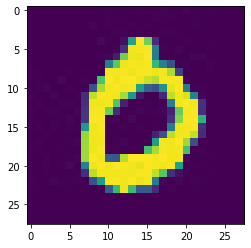

In [10]:
plt.imshow(img)

In [14]:
img = img.reshape(1, -1)

In [15]:
img.shape

(1, 784)

In [17]:
model.predict(img/255)[0]

0

In [18]:
# Flask 연동

In [23]:
!pip install flask

In [22]:
!pip install werkzeug

In [ ]:
from flask import Flask, redirect, request
from werkzeug import utils,serving
import matplotlib.pyplot as plt

#모델 로드
import joblib
load_model = joblib.load('model/MNIST_clf.pkl') 


app = Flask(__name__)
@app.route("/mnist",methods=['GET','POST'])
def mnist():
    
    if request.method=="POST":
        f = request.files["file"]
        fname = 'image_temp/'+str(utils.secure_filename(f.filename)) 
        f.save(fname)#이미지 저장
    
    img = plt.imread(fname)
    result = load_model.predict((img/255).reshape(1,-1))[0]
    return redirect("http://localhost:8081/py/test.jsp?result="+str(result))
    
if __name__ == '__main__':
    serving.run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Jul/2020 11:18:20] "POST /mnist HTTP/1.1" 302 -
127.0.0.1 - - [10/Jul/2020 11:23:59] "POST /mnist HTTP/1.1" 302 -
127.0.0.1 - - [10/Jul/2020 11:24:19] "POST /mnist HTTP/1.1" 302 -
127.0.0.1 - - [10/Jul/2020 11:25:09] "POST /mnist HTTP/1.1" 302 -
